## Notes 
### Required installing Oracle JAVA 8 to get javabridge installed
### Then, I was able to install py-causal from https://bd2kccd.github.io/docs/py-causal/
### GFCI is slower than RFCI, but more accurate (SPIRTES), GFCI and RFCI account for unobserved variables, FGES assumes no unobserved variables.

Structure Learning Performance Guarantees If the assumptions in the previous section hold, then in the large sample limit, the CBN structure output by GFCId will contain an edge of one of four kinds between Xand Y   if and only if Xand Yare not independent conditional on any subset of the other measured variables of less than or equal to a specified size. In addition, there is (1) an arc X->Y   if and only if Xdirectly or indirectly causes Y, and Y   does not directly or indirectly cause X; (2) an edge X <-->Y   if and only if X   is not a direct or indirect cause of Yand Y   is not a direct or indirect cause of X(which can only occur if there are latent confounders of Xand some other variable or Yand some other variable; (3) an edge Xo->Y   only if Yis not a direct or indirect cause of X, but Xmay or may not be an indirect cause of Y; (4) an edge X o–o Y   indicates that Xand Y   are dependent no matter what subset of observed variables is conditioned on, but contains no orientation information (X   may be a direct or indirect cause of Y, and Ymay be an indirect cause of X, or there may be a latent common cause of Xand Y.

# Trying some various ML models

In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle

# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="0" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def get_model(dense, dropouts, inputs):
    # dense is an ordered list of the number of dense neurons like [1024, 2048, 1024]
    # dropouts is an ordered list of the dropout masks like [0.2, 0.3, 0.4]
    inputs = keras.Input(shape = (inputs,))

    x = keras.layers.Dense(dense[0], activation = 'relu')(inputs)
    x = keras.layers.Dropout(dropouts[0])(x, training=True)
    for den, drop in zip(dense[1:], dropouts[1:]):
        x = keras.layers.Dense(den, activation = 'relu')(x)
        x = keras.layers.Dropout(drop)(x, training=True)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)
    model = keras.Model(inputs, outputs)
    return model


/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 4s 116us/step - loss: 1.3664 - mean_squared_error: 1.3664 - val_loss: 1.2213 - val_mean_squared_error: 1.2213

Epoch 00001: val_loss improved from inf to 1.22129, saving model to temp
Epoch 2/20
32000/32000 [==============================] - 4s 111us/step - loss: 1.1816 - mean_squared_error: 1.1816 - val_loss: 1.1401 - val_mean_squared_error: 1.1401

Epoch 00002: val_loss improved from 1.22129 to 1.14007, saving model to temp
Epoch 3/20
32000/32000 [==============================] - 3s 108us/step - loss: 1.1735 - mean_squared_error: 1.1735 - val_loss: 1.1512 - val_mean_squared_error: 1.1512

Epoch 00003: val_loss did not improve from 1.14007
Epoch 4/20
32000/32000 [==============================] - 3s 105us/step - loss: 1.1502 - mean_squared_error: 1.1502 - val_loss: 1.1336 - val_mean_squared_error: 1.1336

Epoch 00004: val_loss improved from 1.14007 to 1.13361, saving model to te

32000/32000 [==============================] - 4s 114us/step - loss: 1.0733 - mean_squared_error: 1.0733 - val_loss: 1.0665 - val_mean_squared_error: 1.0665

Epoch 00011: val_loss improved from 1.06907 to 1.06650, saving model to temp
Epoch 12/20
32000/32000 [==============================] - 4s 113us/step - loss: 1.0719 - mean_squared_error: 1.0719 - val_loss: 1.0675 - val_mean_squared_error: 1.0675

Epoch 00012: val_loss did not improve from 1.06650
Epoch 13/20
32000/32000 [==============================] - 4s 114us/step - loss: 1.0680 - mean_squared_error: 1.0680 - val_loss: 1.0589 - val_mean_squared_error: 1.0589

Epoch 00013: val_loss improved from 1.06650 to 1.05892, saving model to temp
Epoch 14/20
32000/32000 [==============================] - 4s 111us/step - loss: 1.0692 - mean_squared_error: 1.0692 - val_loss: 1.0654 - val_mean_squared_error: 1.0654

Epoch 00014: val_loss did not improve from 1.05892
Epoch 15/20
32000/32000 [==============================] - 4s 114us/step - l

Violation: m7 {'f'} {'b', 'f', 'd', 'a', 'e', 'c'}
Times =  35
1.002178161655956
Times =  36
1.0585403643436646
Violation: m7 {'f'} {'b', 'f', 'd', 'e', 'c'}
Times =  37
1.0281552260989293
Times =  38
0.9953467233233805
Times =  39
1.110561116011045
Times =  40
1.0494706219673144
Violation: m7 {'f'} {'b', 'f', 'd', 'e', 'c'}
Times =  41
1.0189919258306928
Times =  42
1.0422701957871954
Violation: m7 {'f'} {'b', 'f', 'd', 'e', 'c'}
Times =  43
1.0419761711360755
Violation: m7 {'f'} {'b', 'f', 'd', 'e', 'c'}
Times =  44
1.0722789657857907
Times =  45
1.0720910001978845
Times =  46
1.0777413594611125
Violation: m7 {'f'} {'b', 'f', 'd', 'e', 'c'}
Times =  47
1.036536522495188
Violation: m7 {'f'} {'b', 'f', 'd', 'e', 'c'}
Times =  48
1.1270197632001095
Violation: m7 {'f'} {'b', 'f', 'd', 'e', 'c'}
Times =  49
1.052450604864681
Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 4s 120us/step - loss: 1.1298 - mean_squared_error: 1.1298 -

Times =  7
1.0216189557852766
Times =  8
1.039738702913595
Times =  9
1.006249272721758
Times =  10
1.0323392518015275
Violation: m9 {'f'} {'b', 'f', 'd', 'a', 'e', 'c'}
Times =  11
0.9962477888136664
Times =  12
1.0245698059682304
Violation: m9 {'f'} {'b', 'f', 'd', 'a', 'e', 'c'}
Times =  13
1.058295401895616
Times =  14
0.9821882244468901
Violation: m9 {'f'} {'b', 'f', 'd', 'a', 'e', 'c'}
Times =  15
1.0263403623476737
Times =  16
0.9252930336779746
Times =  17
0.9950931902972402
Times =  18
0.9993625105027222
Times =  19
0.9880295162510582
Times =  20
1.0795030223620947
Times =  21
1.047340458396509
Times =  22
0.992392133135797
Violation: m9 {'f'} {'b', 'f', 'd', 'a', 'e', 'c'}
Times =  23
1.0198841285707876
Times =  24
1.0681819265502244
Times =  25
1.0477706979558181
Violation: m9 {'f'} {'b', 'f', 'd', 'a', 'e', 'c'}
Times =  26
1.0248772420731838
Violation: m9 {'f'} {'b', 'f', 'd', 'a', 'e', 'c'}
Times =  27
1.0134541291025063
Times =  28
0.9746794977077358
Violation: m9 {'f'} 

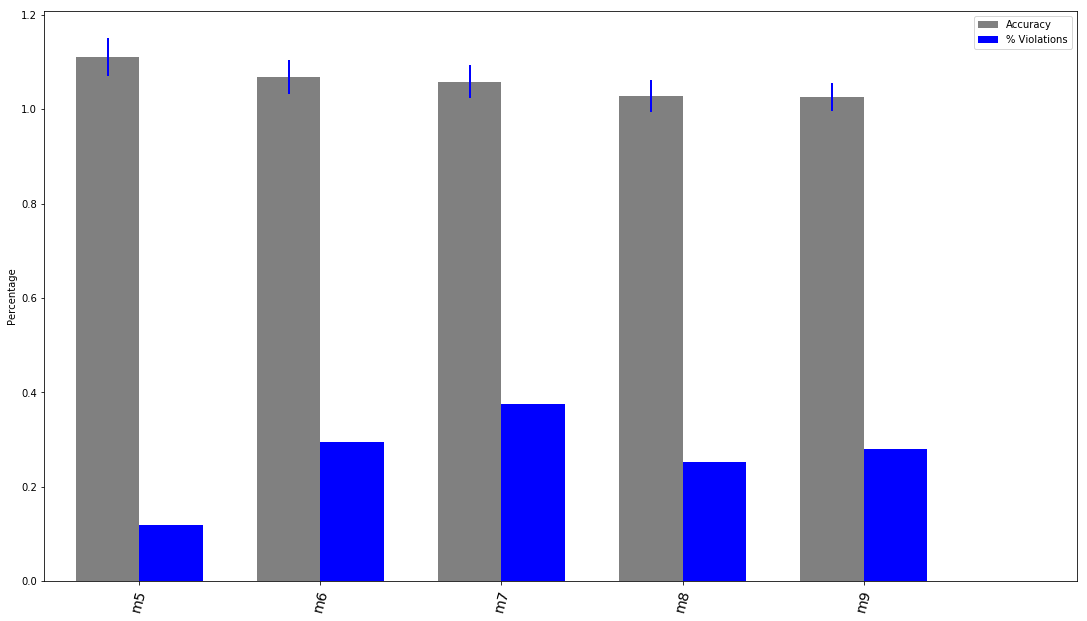

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s




def discrete_gauss(low, high, samples, std = 20):
    x = np.arange(low, high)
    xU, xL = x + 0.5, x - 0.5 
    prob = ss.norm.cdf(xU, scale = std) - ss.norm.cdf(xL, scale = std)
    prob = prob / prob.sum() #normalize the probabilities so their sum is 1
    nums = np.random.choice(x, size = samples, p = prob)
    return nums



def bar_plot(x_ax, val1, val1std, val2, val2std):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ## the data
    N = len(x_ax)

    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars
    fig.set_size_inches(18.5, 10.5)
    ## the bars
    rects1 = ax.bar(ind, val1, width,
                    color='gray',
                    yerr=val1std,
                    error_kw=dict(elinewidth=2,ecolor='blue'))

    rects2 = ax.bar(ind+width, val2, width,
                        color='blue',
                        #yerr=val2std,
                        error_kw=dict(elinewidth=2,ecolor='gray'))

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    #ax.set_ylim(0,45)
    ax.set_ylabel('Percentage')
    ax.set_title('')
    plt.xticks(ind + width / 2, x_ax, rotation=75, size = 14)
    ## add a legend
    ax.legend( (rects1[0], rects2[0]), ('Accuracy', '% Violations') )
    fig.savefig("violations.pdf", bbox_inches='tight')
    plt.show()





def gen_data(mean = 0, var = 1, SIZE = 5000):
    a = np.random.gumbel(mean, var, SIZE)
    b = np.random.gumbel(mean, var, SIZE)
    c = np.random.gumbel(mean, var, SIZE)
    d = np.random.gumbel(mean, var, SIZE)
    e = np.random.gumbel(mean, var, SIZE)
    f= a + b + c + d + e + np.random.gumbel(mean, var, SIZE)
    g = f + np.random.gumbel(mean,var, SIZE)
    g = np.rint(g)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data(mean = 0, var = 1, SIZE = 5000):
    a = np.random.gumbel(mean, var, SIZE)
    b = np.random.gumbel(mean, var, SIZE)
    c = np.random.gumbel(mean, var, SIZE)
    d = np.random.gumbel(mean, var, SIZE)

    f= a + b + c + d + np.random.gumbel(mean, var, SIZE)
    g = f + np.random.gumbel(mean,var, SIZE)
    
    
    g = np.rint(g)
    e = g + np.random.gumbel(mean,var,SIZE)
    
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data(mean = 0, var = 1, SIZE = 40000):
    f = np.random.normal(mean, var, SIZE)
    a = f + np.random.normal(mean, var, SIZE)
    b = f + np.random.normal(mean, var, SIZE)
    c = f + np.random.normal(mean, var, SIZE)
    d = f + np.random.normal(mean, var, SIZE)
    e = f + np.random.normal(mean, var, SIZE)
    g = a + b + c + d + e + np.random.normal(mean, var, SIZE)
    g = np.rint(g)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data(mean = 0, var = 1, SIZE = 40000):
    a = np.random.normal(mean, var, SIZE)
    b = np.random.normal(mean, var, SIZE)
    c = np.random.normal(mean, var, SIZE)
    d = np.random.normal(mean, var, SIZE)
    e = np.random.normal(mean, var, SIZE)
    f= a + b + c + d + e + np.random.normal(mean, var, SIZE)
    g = f + np.random.normal(mean,var, SIZE)
    #g = np.rint(g)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})



def get_CG(df, tetrad):
    tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)
    #tetrad.run(algoId = 'gfci', dfs = df, testId = 'bdeu', scoreId = 'bdeu', dataType = 'discrete',
    #       structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True)


    return tetrad.getTetradGraph()

def get_MB(graph, var, pc):
    parents = set()
    for i in pc.extractTetradGraphEdges(graph):
        if i[-1] == var and i[3:5] == '->':
            parents.add(i[0])
        if i[0] == var and i[3:5] == '->':
            parents.add(i[-1])
    return parents

from pycausal.pycausal import pycausal as pc
from collections import defaultdict
pc = pc()
pc.start_vm(java_max_heap_size = '5000M')
tetrad = s.tetradrunner()



#means = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#variances = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
means = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
variances = [1, 1.5, 2, 2.5, 3, 3.5, 4]

#the number of times to sample 
times = 50

## the size of the test set
nb_test = 2000

val_split = 0.2
verbosity = 0


models = [#[8,8,4],
          #[16,16,8],
          #[32,32,16],
          #[64,64,32],
          [128, 128, 64],
          [256, 256, 128],
          [512, 512, 256],
          [1024, 1024, 512],
          [2048, 2048, 1024],
         ]
model_names = [#'m1', 
               #'m2',
               #'m3',
               #'m4', 
               'm5',
               'm6',
               'm7', 
               'm8',
               'm9'
              ]


violations = np.zeros(len(models))
violation_mean = np.zeros((len(models), times))
mean = np.zeros((len(models), times))

fold = 0

metrics_dicts = []
causal_dicts = []
for m in models:
    metrics_dicts.append(defaultdict(list))
    causal_dicts.append(defaultdict(list))



df = gen_data()
X = df[['a', 'b', 'c', 'd', 'e', 'f']].values
y = df['g'].values

for idx, mod in enumerate(models):
    #clear session
    keras.backend.clear_session() 

    #get model according to specification
    model = get_model(mod, [0.2] * len(models), 6)
    callbacks = [ModelCheckpoint('temp', verbose= verbosity, monitor='val_loss',save_best_only=True), 
                 EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3, verbose= verbosity, mode='auto')]
    model.compile(optimizer = optimizers.SGD(lr = 0.001, momentum = 0.9, ), loss='mean_squared_error', metrics = ['mse'])
    #print(len(X), len(y))
    model.fit(X, y, epochs = 20, validation_split = val_split, callbacks = callbacks, batch_size = 32, verbose = verbosity)

    #load best model according to loss
    model = load_model('temp')


    for t in range(times):
        #print("Times = ", t)
        df_test = gen_data(SIZE = nb_test)
        x_test = df_test[['a', 'b', 'c', 'd', 'e', 'f']].values
        y_test = df_test['g'].values
        test_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
        test_targets = pd.DataFrame(model.predict(x_test), columns = ['g'])
        test_df = test_df.join(test_targets)
        mean[idx][t] = mean_squared_error(y_test, model.predict(x_test))  
        print(mean_squared_error(y_test, model.predict(x_test)))

        setA = get_MB(get_CG(df_test, tetrad), 'g', pc)
        setB = get_MB(get_CG(test_df, tetrad), 'g', pc)

        if setA != {'f'}:
            print("Error in SETA markov blanket")
            setA = {'f'}

        violation_mean[idx][t] = len(setA.difference(setB)) + len(setB.difference(setA))
        if setA != setB:
            print("Violation:", model_names[idx], setA , setB)
            violations[idx] += 1


    # ok at this point we need to check the model on various variances and means
    for m in means:
        for v in variances:
            perturbed_df = gen_data(mean =m, var = v, SIZE = nb_test)
            y_test2 = perturbed_df['g']
            x_test2 = perturbed_df[['a', 'b', 'c', 'd', 'e', 'f']]
            y_pred2 = model.predict(x_test2)
            metrics_dicts[idx][str(m) + '_' + str(v)].append(mean_squared_error(y_test2, y_pred2))

            test_df2 = pd.DataFrame(x_test2, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
            test_targets2 = pd.DataFrame(model.predict(x_test2), columns = ['g'])
            test_df2 = test_df2.join(test_targets2)

            setA = get_MB(get_CG(perturbed_df, tetrad), 'g', pc)
            if setA != {'f'}:
                print("Error in SETA markov blanket")
                setA = {'f'}
            setC = get_MB(get_CG(test_df2, tetrad), 'g', pc)

            if setA != setC:
                causal_dicts[idx][str(m) + '_' + str(v)].append(1)
            else:
                causal_dicts[idx][str(m) + '_' + str(v)].append(0)



print("Violations = ", violations)

metric = []
metric_err = []
viol = []
viol_err = []

#normalize the violations for prettier graphing.
#also violations are always positive, so just divide by max.
violation_mean = violation_mean / np.max(violation_mean)

for i in range(len(violations)):
    print("Model_name = ", model_names[i], "Violations = ", violations[i])
    print("Average_violations = ", np.mean(violation_mean[i]), np.std(violation_mean[i]))
    print("MSE = ", np.mean(mean[i]), np.std(mean[i]))
    #print("mean = ", mean[i])
    metric.append(np.mean(mean[i]))
    metric_err.append(np.std(mean[i]))
    viol.append(np.mean(violation_mean[i]))

    viol_err.append(np.std(violation_mean[i]))
print(np.array(metric), 
         np.array(metric_err), 
         np.array(viol), 
         np.array(viol_err))    

bar_plot(model_names, 
         np.array(metric), 
         np.array(metric_err), 
         np.array(viol), 
         np.array(viol_err))


m5
Area under surface (rectangular approx) =  1261.2231059855226
Violations =  6.0
Average_violations =  0.12
MSE =  1.1109270303406182


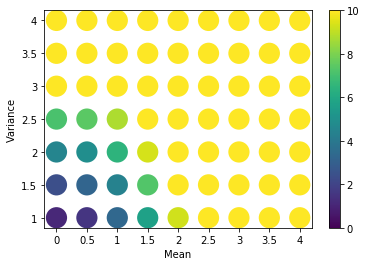

m6
Area under surface (rectangular approx) =  948.0799405136813
Violations =  15.0
Average_violations =  0.29600000000000004
MSE =  1.0682746704832784


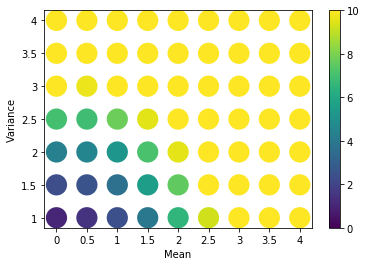

m7
Area under surface (rectangular approx) =  826.7105938914143
Violations =  28.0
Average_violations =  0.376
MSE =  1.0576362326303503


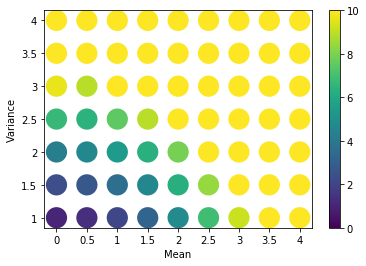

m8
Area under surface (rectangular approx) =  778.0980312294417
Violations =  23.0
Average_violations =  0.252
MSE =  1.028490698124103


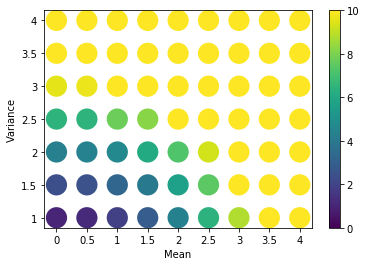

m9
Area under surface (rectangular approx) =  904.8446401154215
Violations =  14.0
Average_violations =  0.28
MSE =  1.025668072963699


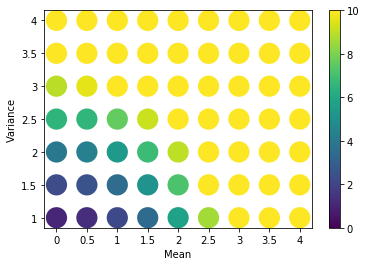

In [52]:
def heat_plot(x,y,z, clim_low = 0, clim_high = 1):
    fig, ax = plt.subplots()

    cax = ax.scatter(x, y, c=z, s=450, edgecolor='')
    cax.set_clim(clim_low, clim_high)
    ax.set_xlabel('Mean')
    ax.set_ylabel('Variance')
    plt.colorbar(cax)
    plt.show()

for i, m in enumerate(models):
    print(model_names[i])
    x = []
    y = []
    z = []
    
    
    rectangular_approx = 0
    for k, v in metrics[i].items():
        x.append(k.split('_')[0])
        y.append(k.split('_')[-1])
        z.append(np.mean(v))
        rectangular_approx += np.mean(v)
    print("Area under surface (rectangular approx) = ", rectangular_approx)
    print("Violations = ", violations[i])
    print("Average_violations = ", np.mean(violation_mean[i]))
    print("MSE = ", np.mean(mean[i]))   
    heat_plot(x,y,z, clim_low = 0, clim_high = 10)
    
#for idx, m in enumerate(models):
#    print(model_names[idx])      
#    x = []
#    y = []
#    z = []
#    for k, v in causal_dicts[idx].items():
#        x.append(k.split('_')[0])
#        y.append(k.split('_')[-1])
#        z.append(np.sum(v) / len(v))
#    print("Causal assurance")
#    heat_plot(x,y,z, clim_low = 0, clim_high = 1) 

In [46]:
violations

array([ 6., 15., 28., 23., 14.])